<center><h1 style="color:blue">Cidades e Seus Provedores de NFSe</h1></center>

<p>Sua missão é capturar os dados contidos no arquivo <i><b>cidades.txt</b></i>, migrá-los a um banco de dados relacional SQLite e levantar um gráfico de barras que traga a relação da quantidade de cidades que utilizam um mesmo provedor para envio de NFSe.</p>
<p>Caso houverem muitos provedores diferentes (mais de sete), pegue apenas os cinco principais, ou seja, aqueles que comportam mais cidades.</p>

<hr style="background-color:gold"></hr>

<h2 style="color:red">1 - Migrando dados para o SQLite</h2>

In [3]:
import sqlite3

In [180]:
# Leitura do arquivo
cidades_list = []

with open('arquivos\cidades.txt', 'r') as cidades:
    # armazena o conjunto de informações de uma cidade
    cidade = []
    
    # leitura de cada linha do arquivo
    for linha in cidades.readlines(): 
            # como cada cidade é separada por uma linha em branco
            # enquanto não encontrar esta linha em branco, posso assegurar com certeza,
            # de que a informação é da mesma cidade
            if linha != '\n': cidade.append(linha)
            
            # linha branca encontrada
            else:
                # se caso 'cidade' estiver preenchido, adiciono seus dados na lista 
                if cidade != []:
                    cidades_list.append(cidade) # cidade adicionada
                    cidade = [] # grupo de dados zerado para poder armazenar dados da próxima cidade


In [181]:
# Limpeza do arquivo (retirar dados NomeURL_H e _P LinkURL_H e _P)
for index in range(0, len(cidades_list)):
    if len(cidades_list[index]) > 4:
        while len(cidades_list[index]) > 4: del cidades_list[index][4]

In [182]:
cidades_list

[['[3500105]\n', 'Nome=Adamantina\n', 'UF=SP\n', 'Provedor=4R\n'],
 ['[3510203]\n', 'Nome=Capão Bonito\n', 'UF=SP\n', 'Provedor=4R\n'],
 ['[3522109]\n', 'Nome=Itanhaem\n', 'UF=SP\n', 'Provedor=4R\n'],
 ['[3522307]\n', 'Nome=Itapetininga\n', 'UF=SP\n', 'Provedor=4R\n'],
 ['[3523503]\n', 'Nome=Itatinga\n', 'UF=SP\n', 'Provedor=4R\n'],
 ['[3554003]\n', 'Nome=Tatui\n', 'UF=SP\n', 'Provedor=4R\n'],
 ['[3507001]\n', 'Nome=Boituva\n', 'UF=SP\n', 'Provedor=4R\n'],
 ['[3555109]\n', 'Nome=Tupi Paulista\n', 'UF=SP\n', 'Provedor=4R\n'],
 ['[3540606]\n', 'Nome=Porto Feliz\n', 'UF=SP\n', 'Provedor=4R\n'],
 ['[1200401]\n', 'Nome=Rio Branco\n', 'UF=AC\n', 'Provedor=Abaco\n'],
 ['[3201209]\n',
  'Nome=Cachoeiro do Itapemirim\n',
  'UF=ES\n',
  'Provedor=Abaco\n'],
 ['[4304606]\n', 'Nome=Canoas\n', 'UF=RS\n', 'Provedor=Abaco\n'],
 ['[5107040]\n', 'Nome=Primavera do Leste\n', 'UF=MT\n', 'Provedor=Abaco\n'],
 ['[5107602]\n', 'Nome=Rondonopolis\n', 'UF=MT\n', 'Provedor=Abaco\n'],
 ['[3131307]\n', 'Nome=Ipa

In [183]:
# Limpeza dos dados: retirando '\n' e 'nome/uf/provedor' como identificadores
for index in range(0, len(cidades_list)):
    # Retirando '\n'
    cidades_list[index][0] = cidades_list[index][0].replace('\n', '')
    cidades_list[index][1] = cidades_list[index][1].replace('\n', '')
    cidades_list[index][2] = cidades_list[index][2].replace('\n', '')
    cidades_list[index][3] = cidades_list[index][3].replace('\n', '')
    
    # Retirando 'nome/uf/provedor'
    cidades_list[index][1] = cidades_list[index][1].replace('Nome=', '')
    cidades_list[index][2] = cidades_list[index][2].replace('UF=', '')
    cidades_list[index][3] = cidades_list[index][3].replace('Provedor=', '')

In [184]:
cidades_list

[['[3500105]', 'Adamantina', 'SP', '4R'],
 ['[3510203]', 'Capão Bonito', 'SP', '4R'],
 ['[3522109]', 'Itanhaem', 'SP', '4R'],
 ['[3522307]', 'Itapetininga', 'SP', '4R'],
 ['[3523503]', 'Itatinga', 'SP', '4R'],
 ['[3554003]', 'Tatui', 'SP', '4R'],
 ['[3507001]', 'Boituva', 'SP', '4R'],
 ['[3555109]', 'Tupi Paulista', 'SP', '4R'],
 ['[3540606]', 'Porto Feliz', 'SP', '4R'],
 ['[1200401]', 'Rio Branco', 'AC', 'Abaco'],
 ['[3201209]', 'Cachoeiro do Itapemirim', 'ES', 'Abaco'],
 ['[4304606]', 'Canoas', 'RS', 'Abaco'],
 ['[5107040]', 'Primavera do Leste', 'MT', 'Abaco'],
 ['[5107602]', 'Rondonopolis', 'MT', 'Abaco'],
 ['[3131307]', 'Ipatinga', 'MG', 'Actcon'],
 ['[3138401]', 'Leopoldina', 'MG', 'Actconv2'],
 ['[3127701]', 'Governador Valadares', 'MG', 'Actconv201'],
 ['[3136702]', 'Juiz de Fora', 'MG', 'Actconv202'],
 ['[1702109]', 'Araguaína', 'TO', 'Bethav2'],
 ['[5103304]', 'Comodoro', 'MT', 'Betha'],
 ['[3144607]', 'Nepomuceno', 'MG', 'Betha'],
 ['[4311304]', 'Lagoa Vermelha', 'RS', 'Beth

In [193]:
# Abrindo conexão
con = sqlite3.connect('nfse_cidades.db')
cur = con.cursor()

In [194]:
# Inserindo dados no banco
query = 'INSERT INTO cidades(codigo, nome, uf, provedor) VALUES(?, ?, ?, ?)'
for cidade in cidades_list: cur.execute(query, (cidade[0], cidade[1], cidade[2], cidade[3]))
cur.execute('commit')

In [195]:
# Fechando conexão
cur.close()
con.close()

<h2 style='color:red'>Extraindo os 5 Provedores mais Utilizados</h2>

In [49]:
qnt_total = None # quantidade de registros salvos no banco de dados
top_5 = [] # os cinco provedores mais utilizados >> [nome_provedor, quantidade_de_cidades]

In [50]:
# Abrindo Conexão
con = sqlite3.connect('nfse_cidades.db')
cur = con.cursor()

In [51]:
# Buscando dados no banco
qnt_total = cur.execute('SELECT COUNT() FROM cidades;').fetchall()
top_5 = cur.execute('SELECT provedor, COUNT(*) AS qnt ' \
                  'FROM cidades ' \
                  +'GROUP BY provedor ' \
                  +'ORDER BY count(*) DESC ' \
                  +'LIMIT 5;').fetchall()

In [52]:
# Dados coletados no banco
print('Quantidade de registros: %s\nTop 5 dos provedores mais utilizados: %s' \
     % (qnt, top_5))

Quantidade de registros: [(787,)]
Top 5 dos provedores mais utilizados: [('Betha', 131), ('WebISS', 76), ('GINFES', 69), ('SH3', 40), ('ISSNET', 39)]


In [53]:
# Fechando conexão
cur.close()
con.close()

<h2 style='color:red'>Montagem do Gráfico de Barras</h2>

In [195]:
# Importação
import matplotlib.pyplot as plt

In [55]:
# Funções
def extrai_provedores(lista):
    for tupla in lista: yield tupla[0]
        
def extrai_qnt(lista):
    for tupla in lista: yield tupla[1]
        
# Lambdas
avg = lambda x,y: sum(x) / y

In [62]:
# Preparação dos dados
nomes_provedores = list(extrai_provedores(top_5))
qnt_provedores = list(extrai_qnt(top_5))
porc = round(avg(qnt_provedores, qnt_total[0][0]), 2)

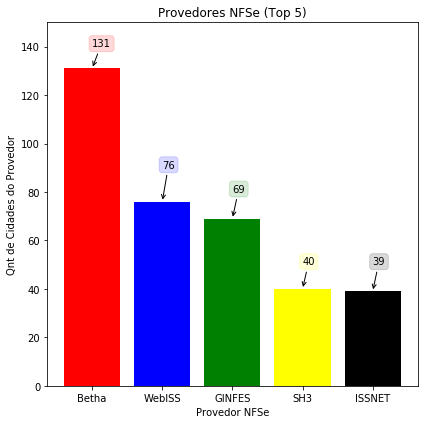

In [199]:
# Montagem do Gráfico

# Estrutura
plt.figure(figsize=(6,6))
plt.title('Provedores NFSe (Top 5)')
plt.xlabel('Provedor NFSe')
plt.ylabel('Qnt de Cidades do Provedor')
plt.ylim(0, 150)

# Gráfico
plt.bar(nomes_provedores, 
        qnt_provedores, 
        color=['red', 'blue', 'green', 'yellow', 'black'],
        width=0.8)


# Anotações
plt.annotate(qnt_provedores[0], 
            xy=(0, qnt_provedores[0]),
            xycoords='data',
            xytext=(0, 140),
            textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            bbox=dict(boxstyle="round", color='red', alpha=0.15))

plt.annotate(qnt_provedores[1], 
            xy=(1, qnt_provedores[1]),
            xycoords='data',
            xytext=(1, 90),
            textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            bbox=dict(boxstyle="round", color='blue', alpha=0.15))

plt.annotate(qnt_provedores[2], 
            xy=(2, qnt_provedores[2]),
            xycoords='data',
            xytext=(2, 80),
            textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            bbox=dict(boxstyle="round", color='green', alpha=0.15))

plt.annotate(qnt_provedores[3], 
            xy=(3, qnt_provedores[3]),
            xycoords='data',
            xytext=(3, 50),
            textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            bbox=dict(boxstyle="round", color='yellow', alpha=0.15))

plt.annotate(qnt_provedores[4], 
            xy=(4, qnt_provedores[4]),
            xycoords='data',
            xytext=(4, 50),
            textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            bbox=dict(boxstyle="round", color='black', alpha=0.15))


# Exibição
plt.tight_layout()